In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
image_size = [224,224]
data_path = 'data'

In [3]:
vgg = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

vgg.output

x = vgg.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)

preds = Dense(2,activation='softmax')(x)

model = Model(inputs = vgg.input,outputs=preds)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:

for layer in vgg.layers:
    layer.trainable = False

datagen=ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2) #included in our dependencies

train_generator=datagen.flow_from_directory('data/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='training')

validation_generator = datagen.flow_from_directory(
    'data/', # same directory as training data
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(train_generator.n)
print(validation_generator.n)
print(train_generator.batch_size)
print(253//32)

step_size_train=train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

Found 5822 images belonging to 2 classes.
Found 1454 images belonging to 2 classes.
5822
1454
32
7


In [5]:
# Save the model after every epoch
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

r = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   validation_data = validation_generator,
                   validation_steps = validation_steps,
                   epochs=5,
                   callbacks=[checkpoint])

C:\Users\shiba\AppData\Local\Temp\ipykernel_15872\2206202059.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(generator=train_generator,


Epoch 1/5
181/181 [==============================] - ETA: 0s - loss: 0.2765 - accuracy: 0.9430
Epoch 1: val_loss improved from inf to 0.07411, saving model to best_model.h5
181/181 [==============================] - 1878s 10s/step - loss: 0.2765 - accuracy: 0.9430 - val_loss: 0.0741 - val_accuracy: 0.9750
Epoch 2/5
181/181 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9843
Epoch 2: val_loss improved from 0.07411 to 0.04191, saving model to best_model.h5
181/181 [==============================] - 1721s 10s/step - loss: 0.0487 - accuracy: 0.9843 - val_loss: 0.0419 - val_accuracy: 0.9889
Epoch 3/5
181/181 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 0.9865
Epoch 3: val_loss improved from 0.04191 to 0.02625, saving model to best_model.h5
181/181 [==============================] - 1716s 9s/step - loss: 0.0360 - accuracy: 0.9865 - val_loss: 0.0262 - val_accuracy: 0.9924
Epoch 4/5
181/181 [==============================] - ETA: 0s - loss: 0.0

In [6]:
from sklearn.metrics import confusion_matrix, classification_report

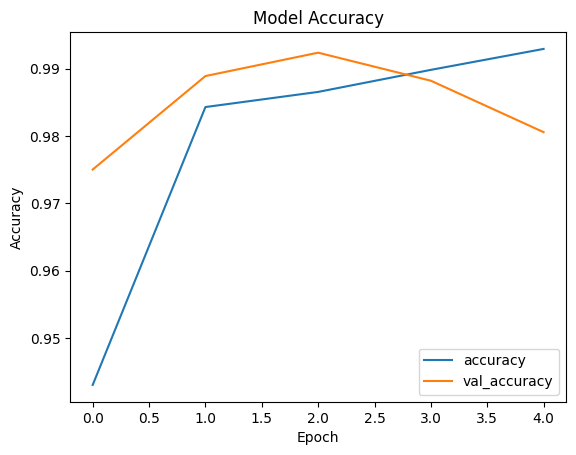

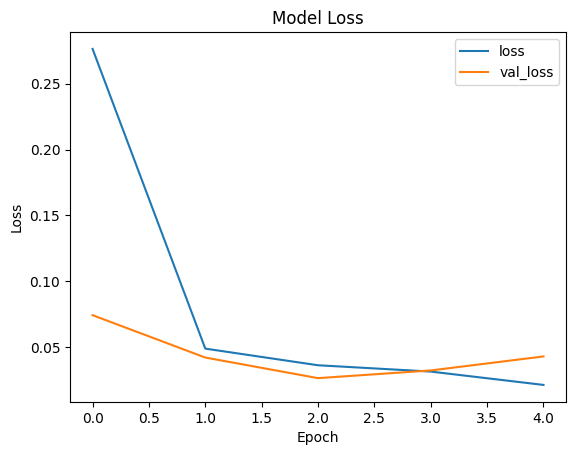

In [7]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()